In [1]:
import os
import anndata
import scanpy as sc
import pandas as pd
import numpy as np
import math
import seaborn as sns
from scipy import sparse
from scipy.stats import spearmanr, pearsonr
from scipy.spatial import distance_matrix
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib.colors import LinearSegmentedColormap

import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

In [3]:
def generate_neighbors(coordinates):
    neigh = pd.DataFrame(index=coordinates.index,columns=['neighbor'])
    for cell in coordinates.index:
        row = coordinates.loc[cell]['row']
        col = coordinates.loc[cell]['col']
        position_list = [(row,col-2),(row,col+2),(row-1,col-1),(row-1,col+1),(row+1,col-1),(row+1,col+1)] 
        record = []
        for item in position_list:
            tmp = coordinates.loc[(coordinates['row'] == item[0]) & (coordinates['col'] == item[1])].index.tolist()
            if tmp != []:
                record.append(tmp[0])
        neigh.loc[cell] = [record]
    return neigh

>Load raw data and coordinates

In [5]:
'spot cell count'
cell_count = pd.read_csv('/home/qukun/ccp1997/GBM_10X/analysis_part3/visium/totle/P77_A1/P77_A1_spot_cell_counts.csv',index_col=0)

c2l_result = pd.read_csv('/home/qukun/ccp1997/GBM_VISIUM/cell2location_with_neuron_v2/c2l_P77_A1_final_results.csv',index_col=0)
c2l_result.columns = [ item.split('_')[-1] for item in c2l_result.columns ]

c2l_result = c2l_result.loc[cell_count.index]

count_P77_A1 = pd.read_csv('/home/qukun/ccp1997/GBM_10X/analysis_part3/visium/totle/P77_A1/spot_count.csv',index_col=0)
count_P77_A1.columns = [item.split('.')[0]+'-1' for item in count_P77_A1.columns]

coordinates = pd.read_csv('/home/qukun/ccp1997/GBM_10X/analysis_part3/visium/totle/P77_A1/coordinates.csv',index_col=0)
coordinates = coordinates.loc[cell_count.index]

result = generate_neighbors(coordinates)


>Rotate the coordinates to match the H&E staining image

In [8]:
coordinates['row']  = [ max(coordinates['imagecol'])-(item - min(coordinates['imagecol'])) for item in coordinates['imagerow']]            
tem = pd.read_csv('/home/qukun/ccp1997/GBM_10X/analysis_part3/visium/totle/P77_A1/coordinates.csv',index_col=0)
tem = tem.loc[cell_count.index]
coordinates['row_position'] = tem['row']

norm_P77_A1 = pd.read_csv('/home/qukun/ccp1997/GBM_10X/analysis_part3/visium/totle/P77_A1/spot_norm.csv',index_col=0)  
norm_P77_A1.columns = [ item.split('.')[0] + '-1' for item in norm_P77_A1.columns]
norm_P77_A1 = norm_P77_A1[c2l_result.index]
coordinates = pd.concat([coordinates,norm_P77_A1.T],axis=1)


>Read the strength of LR pairs estimated by COMMOT software

In [9]:
'h5ad'
adata = sc.read_h5ad('/home/qukun/wangrirui/project/GBM/commot/commot_h5ad/refine_h5ad/P77_A1_commot.h5ad')

>Plot

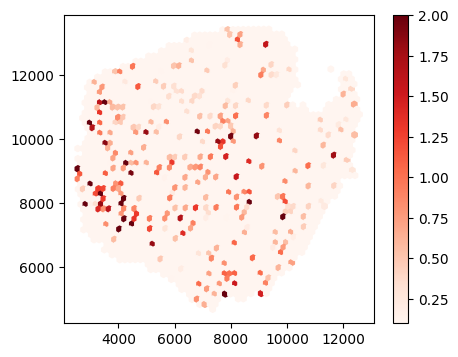

In [297]:
lr_pair = 'LIF-IL6ST'
lr_strength = (adata.obsm['commot-our_db-sum-sender'].loc[coordinates.index]['s-' + lr_pair] + adata.obsm['commot-our_db-sum-receiver'].loc[coordinates.index]['r-' + lr_pair])/2  
plt.figure(figsize=(5,4))
plt.scatter(x=coordinates['imagecol'],y=coordinates['row'],s=20,marker='h',c= lr_strength ,cmap ='Reds',alpha=1,rasterized=True ,vmin=0.1,vmax=2)         
plt.colorbar()
#plt.savefig('/home/qukun/ccp1997/GBM_10X/In_depth/figure/result_2/interaction/P77_A1_LIF_IL6ST_Reds_commot.pdf',dpi=500)


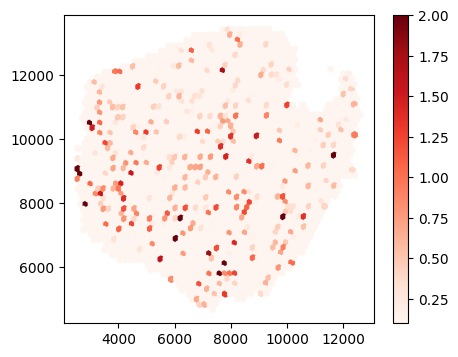

In [298]:
lr_pair = 'LIF-LIFR'
lr_strength = (adata.obsm['commot-our_db-sum-sender'].loc[coordinates.index]['s-' + lr_pair] + adata.obsm['commot-our_db-sum-receiver'].loc[coordinates.index]['r-' + lr_pair])/2  
plt.figure(figsize=(5,4))
plt.scatter(x=coordinates['imagecol'],y=coordinates['row'],s=20,marker='h',c= lr_strength ,cmap ='Reds',alpha=1,rasterized=True ,vmin=0.1,vmax=2)         
plt.colorbar()
#plt.savefig('/home/qukun/ccp1997/GBM_10X/In_depth/figure/result_2/interaction/P77_A1_LIF_LIFR_Reds_commot.pdf',dpi=500)


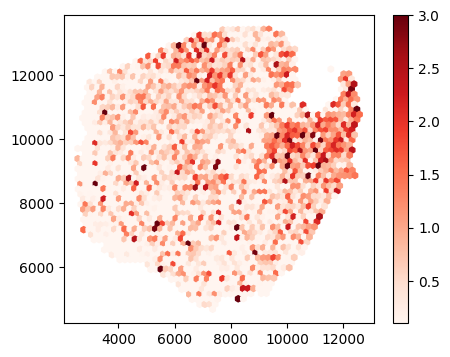

In [301]:
lr_pair = 'NRXN1-NLGN3'
lr_strength = (adata.obsm['commot-our_db-sum-sender'].loc[coordinates.index]['s-' + lr_pair] + adata.obsm['commot-our_db-sum-receiver'].loc[coordinates.index]['r-' + lr_pair])/2  
plt.figure(figsize=(5,4))
plt.scatter(x=coordinates['imagecol'],y=coordinates['row'],s=20,marker='h',c= lr_strength ,cmap ='Reds',alpha=1,rasterized=True ,vmin=0.1,vmax=3)         
plt.colorbar()
#plt.savefig('/home/qukun/ccp1997/GBM_10X/In_depth/figure/result_2/interaction/P77_A1_NRXN1_NLGN3_Reds_commot.pdf',dpi=500)


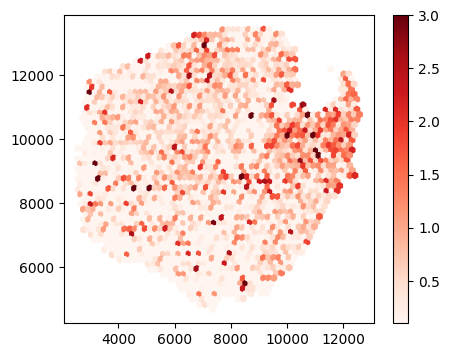

In [302]:
lr_pair = 'NRXN2-NLGN3'
lr_strength = (adata.obsm['commot-our_db-sum-sender'].loc[coordinates.index]['s-' + lr_pair] + adata.obsm['commot-our_db-sum-receiver'].loc[coordinates.index]['r-' + lr_pair])/2  
plt.figure(figsize=(5,4))
plt.scatter(x=coordinates['imagecol'],y=coordinates['row'],s=20,marker='h',c= lr_strength ,cmap ='Reds',alpha=1,rasterized=True ,vmin=0.1,vmax=3 )         
plt.colorbar()
#plt.savefig('/home/qukun/ccp1997/GBM_10X/In_depth/figure/result_2/interaction/P77_A1_NRXN2_NLGN3_Reds_commot.pdf',dpi=500)


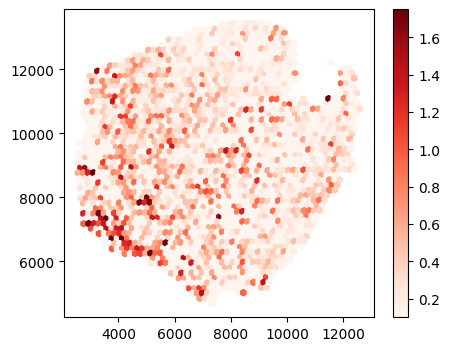

In [305]:
lr_pair = 'TGFB1-ITGB1'
lr_strength = (adata.obsm['commot-our_db-sum-sender'].loc[coordinates.index]['s-' + lr_pair] + adata.obsm['commot-our_db-sum-receiver'].loc[coordinates.index]['r-' + lr_pair])/2  
plt.figure(figsize=(5,4))
plt.scatter(x=coordinates['imagecol'],y=coordinates['row'],s=20,marker='h',c= lr_strength ,cmap ='Reds',alpha=1,rasterized=True ,vmin=0.1,vmax=1.75)         
plt.colorbar()
#plt.savefig('/home/qukun/ccp1997/GBM_10X/In_depth/figure/result_2/interaction/P77_A1_TGFB1_ITGB1_Reds_commot.pdf',dpi=500)


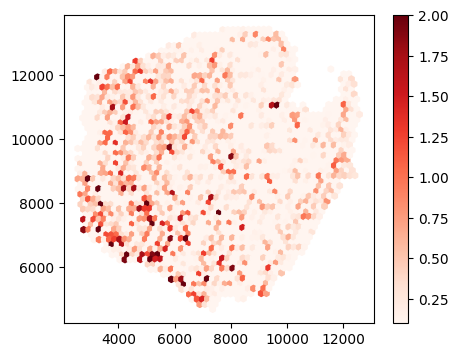

In [306]:
lr_pair = 'TGFB1-TGFBR2'
lr_strength = (adata.obsm['commot-our_db-sum-sender'].loc[coordinates.index]['s-' + lr_pair] + adata.obsm['commot-our_db-sum-receiver'].loc[coordinates.index]['r-' + lr_pair])/2  
plt.figure(figsize=(5,4))
plt.scatter(x=coordinates['imagecol'],y=coordinates['row'],s=20,marker='h',c= lr_strength ,cmap ='Reds',alpha=1,rasterized=True ,vmin=0.1,vmax=2)         
plt.colorbar()
#plt.savefig('/home/qukun/ccp1997/GBM_10X/In_depth/figure/result_2/interaction/P77_A1_TGFB1_TGFBR2_Reds_commot.pdf',dpi=500)
